In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pickle
#from scipy.misc import imread

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = np.load('YSong-Apr01_data.npy')

In [3]:
data.shape

(400, 214)

<IPython.core.display.Javascript object>


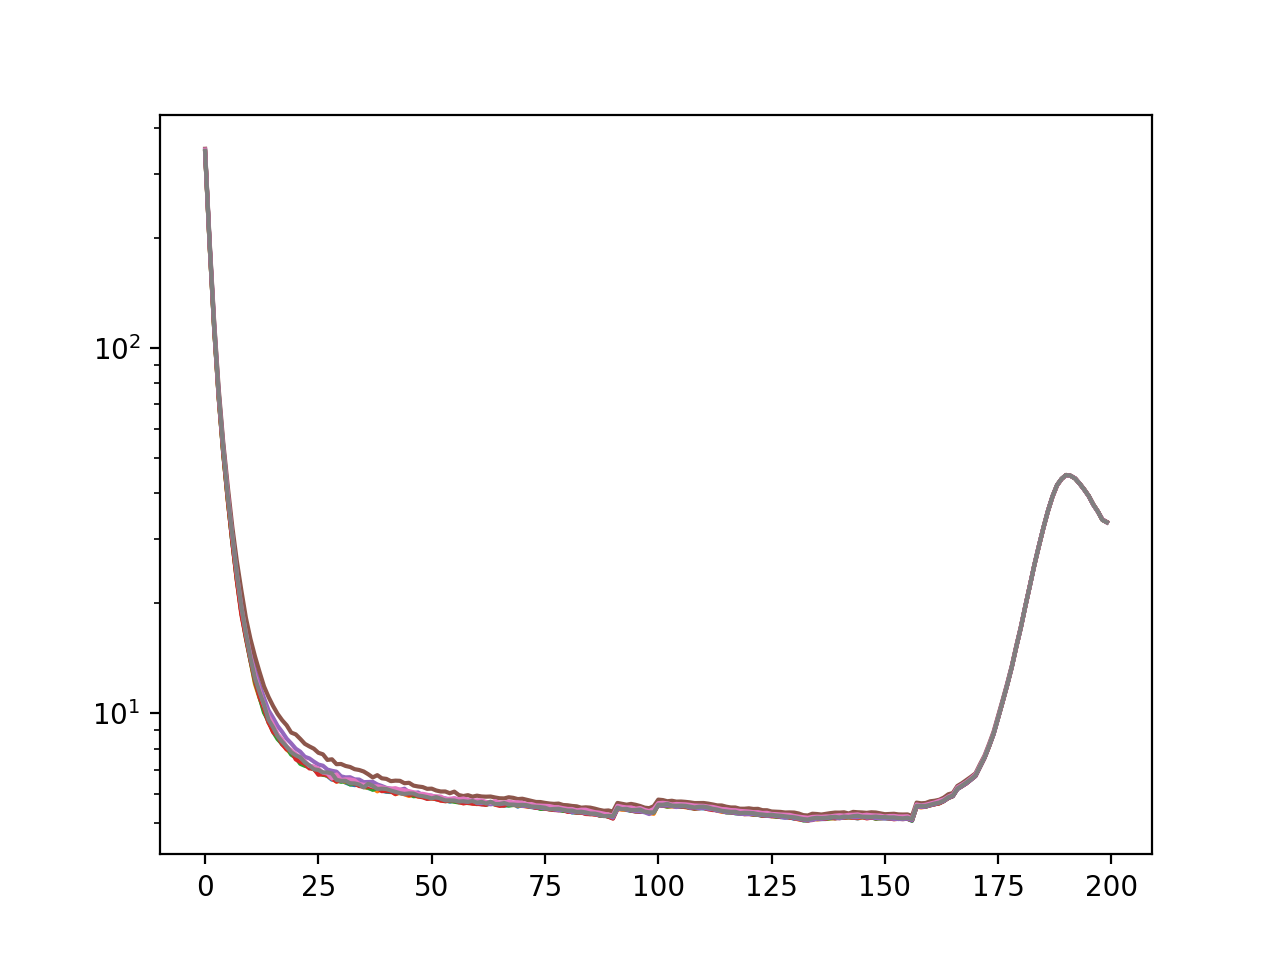

In [31]:
# plot of the raw data
fig, ax = plt.subplots()
ax.semilogy(data[0::50,:-14].T)

In [131]:
# cut and normalize data first
cut_v = 14  # all zero values in the end
bg_range = 100  # select data as backgroud
bg = np.average(data[:bg_range,:-cut_v], axis=0)

<IPython.core.display.Javascript object>


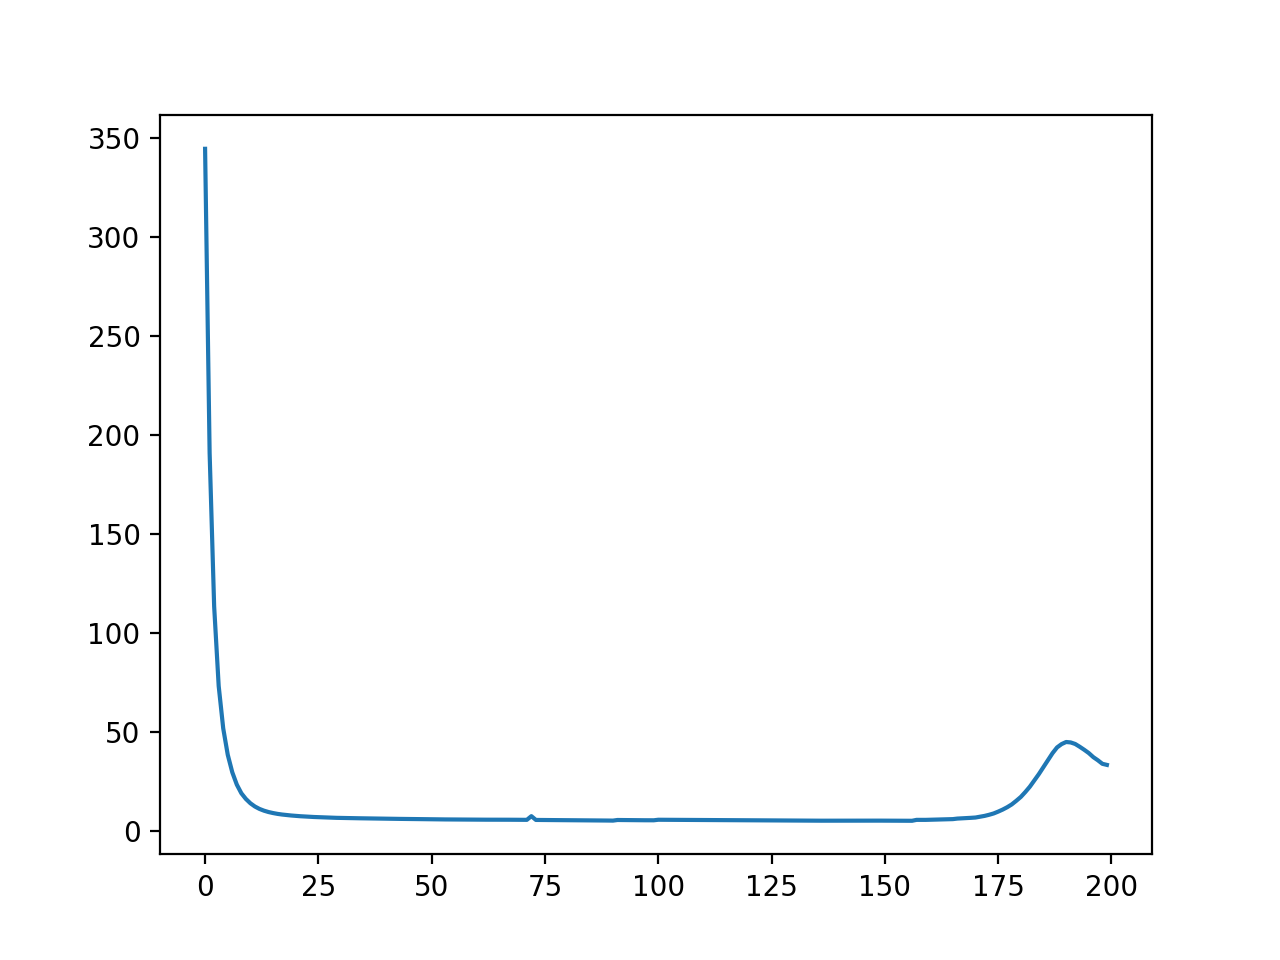

In [132]:
fig, ax = plt.subplots()
ax.plot(bg)

In [133]:
# data after backgroud reduction
data_norm = data[bg_range:,:-cut_v] - bg
print('data shape: ', data_norm.shape)

data shape:  (300, 200)


<IPython.core.display.Javascript object>


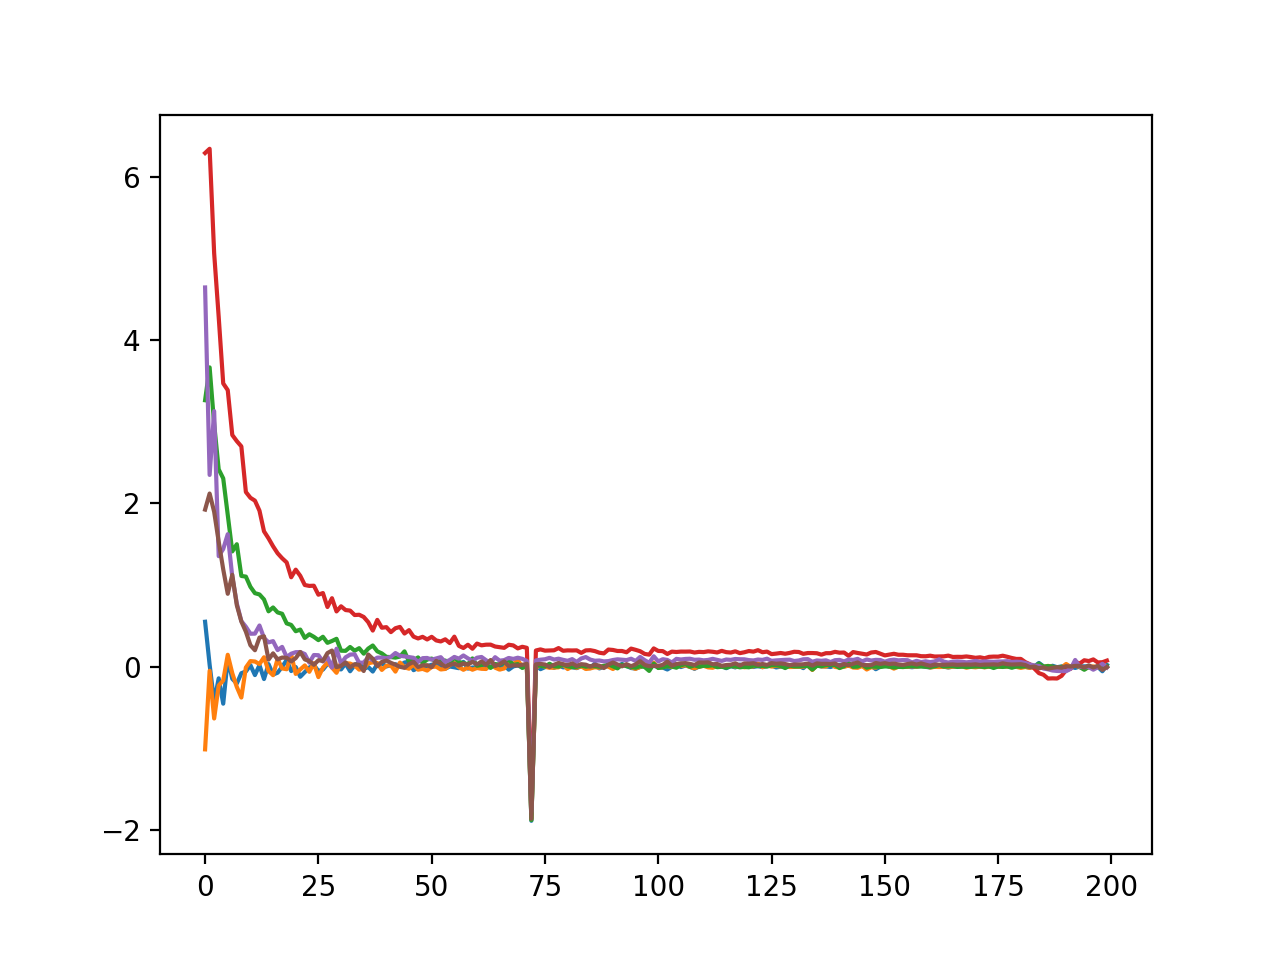

In [134]:
# plot of the data after backgroud reduction
fig, ax = plt.subplots()
#ax.semilogy(data_norm[0::50,:].T)
ax.plot(data_norm[0::50,:].T)

# PCA

In [135]:
# get low dimension from PCA for plot
n_comp = 5

# zero mean and unit variance, standard step in PCA
data_scaled = preprocessing.scale(data_norm)
#data_scaler = data_norm

pca = PCA(n_components=n_comp)
reduced_data = pca.fit_transform(data_scaled)
print(pca.components_.shape, data_norm.shape)

(5, 200) (300, 200)


<IPython.core.display.Javascript object>


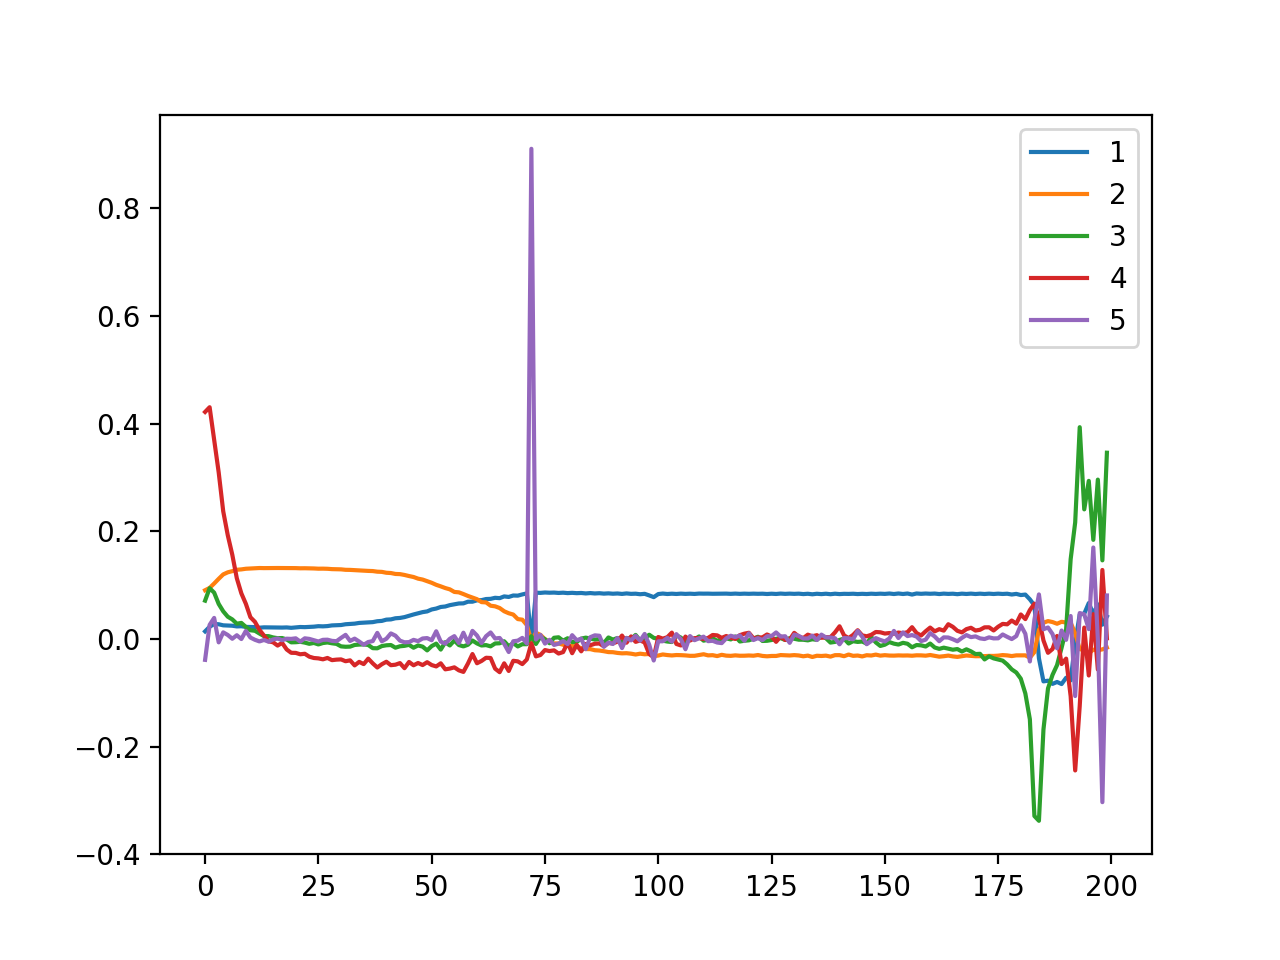

In [136]:
# plot different components from PCA
fig, ax = plt.subplots()
for i in range(n_comp):
    ax.plot(pca.components_[i], label=str(i+1))
ax.legend()

<IPython.core.display.Javascript object>


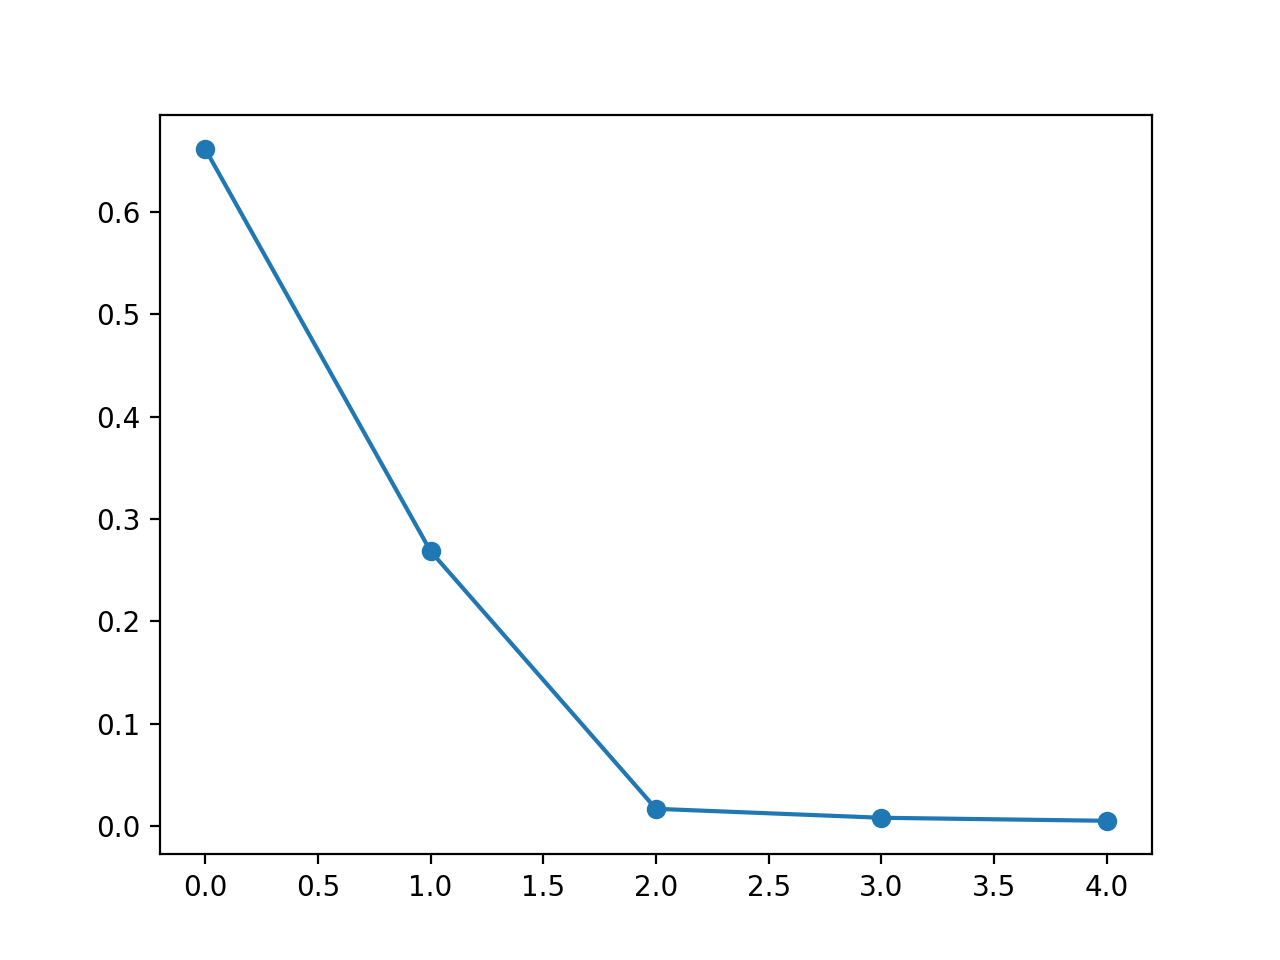

In [137]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, '-o')

<IPython.core.display.Javascript object>


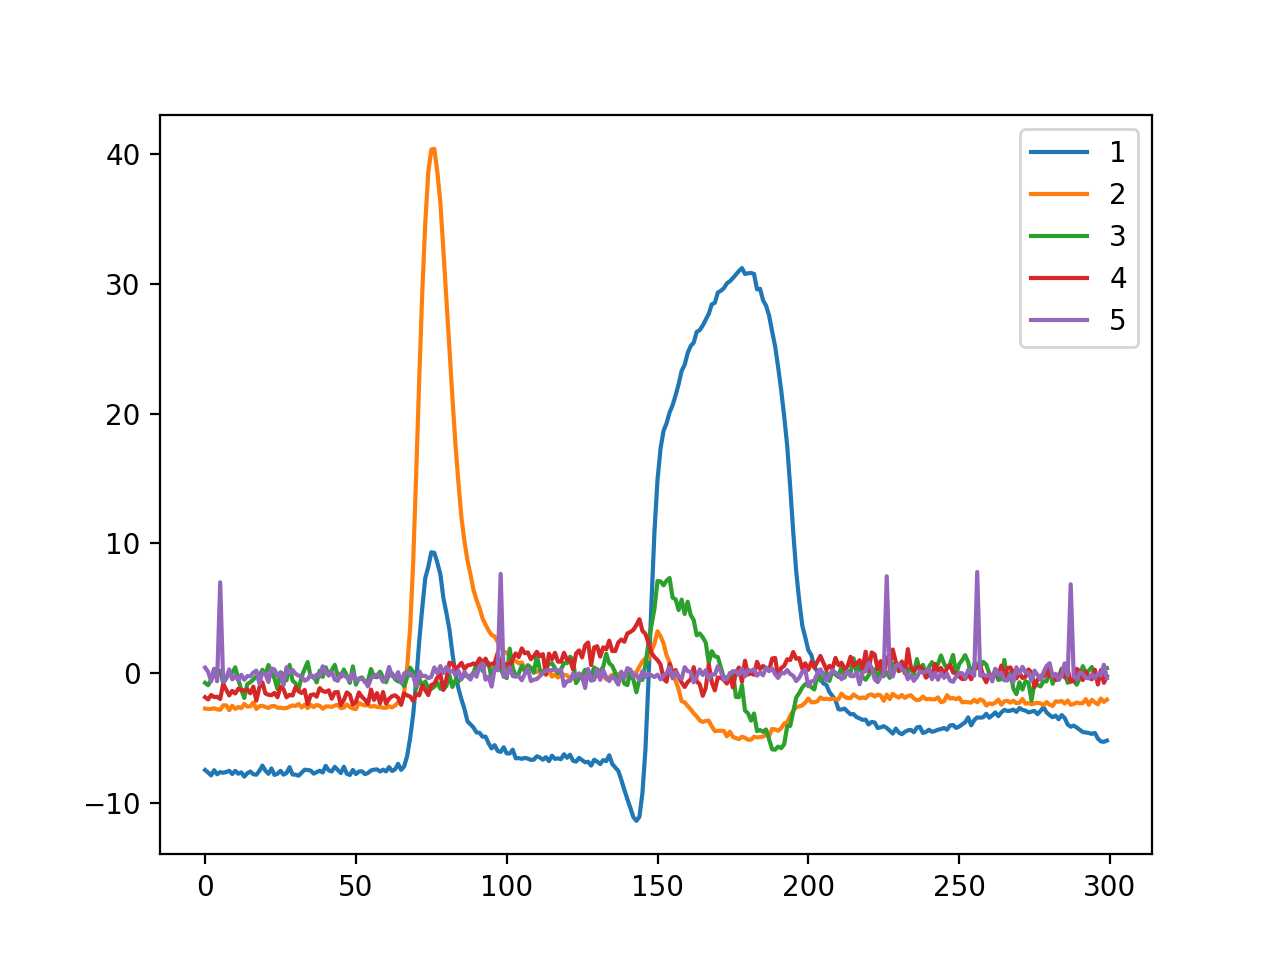

In [138]:
# projections on different principle components as a function of frame number
fig, ax = plt.subplots()
for i in range(0, n_comp):
    ax.plot(reduced_data[:,i], label=str(i+1))
ax.legend()

In [139]:
# get low dimension from PCA for plot
n_comp = 5

# zero mean and unit variance, standard step in PCA
data_scaler = data_norm

pca = PCA(n_components=n_comp)
reduced_data = pca.fit_transform(data_scaled)
print(pca.components_.shape, data_norm.shape)


(5, 200) (300, 200)


<IPython.core.display.Javascript object>


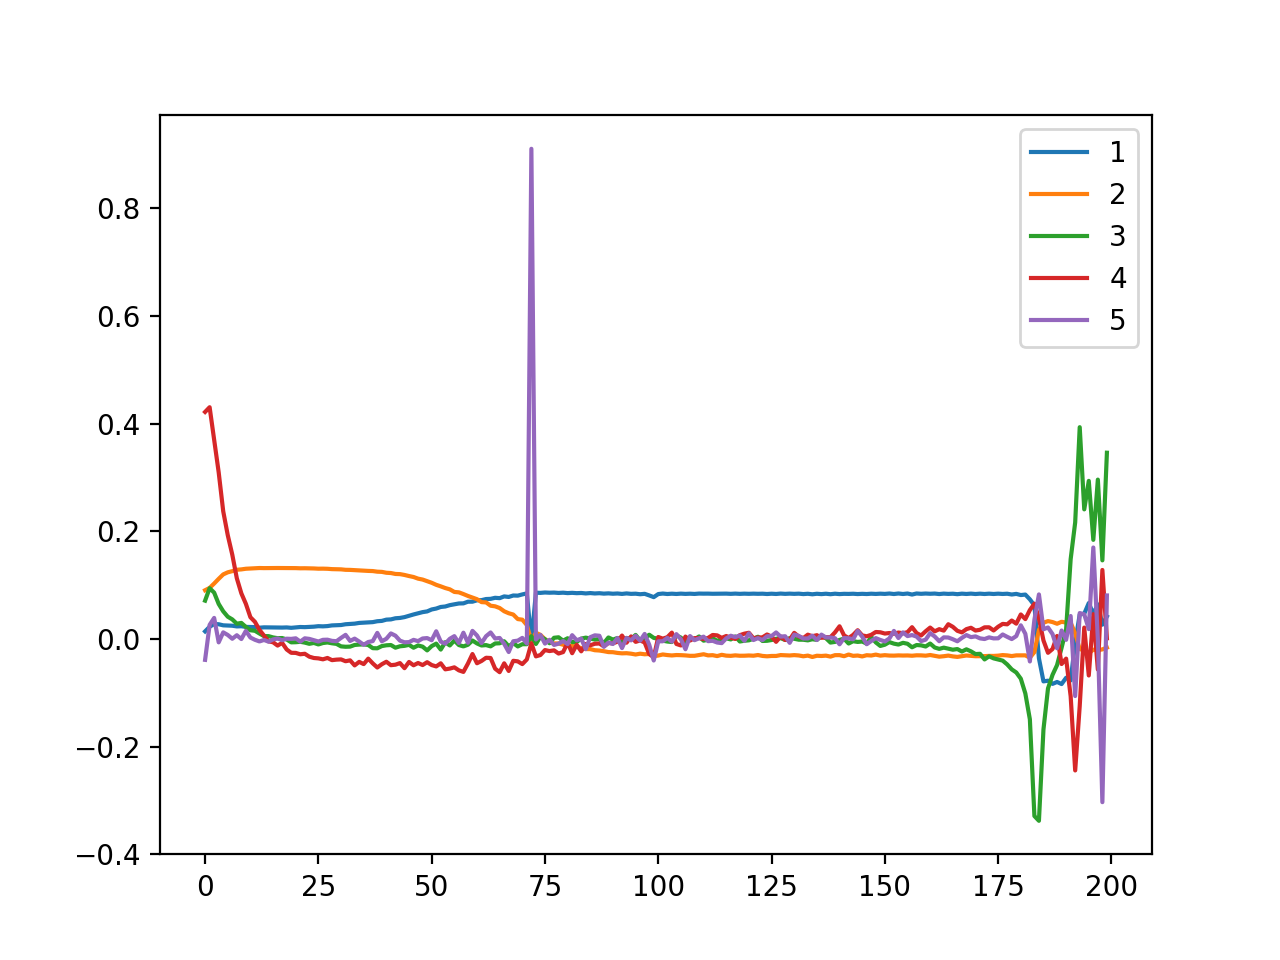

In [140]:
# plot different components from PCA
fig, ax = plt.subplots()
for i in range(n_comp):
    ax.plot(pca.components_[i], label=str(i+1))
ax.legend()

<IPython.core.display.Javascript object>


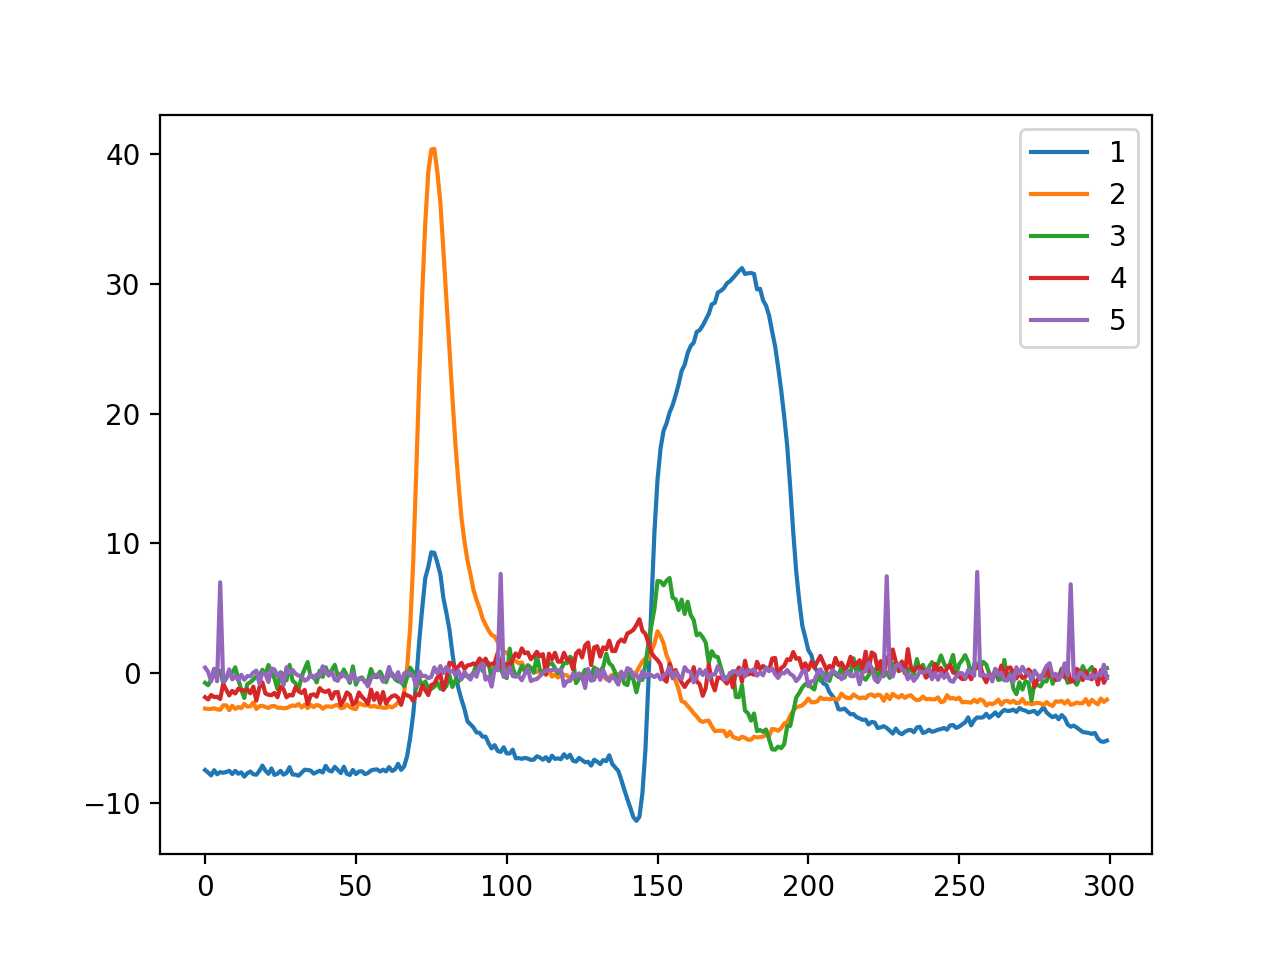

In [141]:
# projections on different principle components as a function of frame number
fig, ax = plt.subplots()
for i in range(0, n_comp):
    ax.plot(reduced_data[:,i], label=str(i+1))
ax.legend()

# Kmeans

In [142]:
#np.random.seed(42)

# K means on reduced data (gives similar results as whole dataset)
nclusters = 3
kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=10)
kmeans_out = kmeans.fit_predict(reduced_data)

<IPython.core.display.Javascript object>


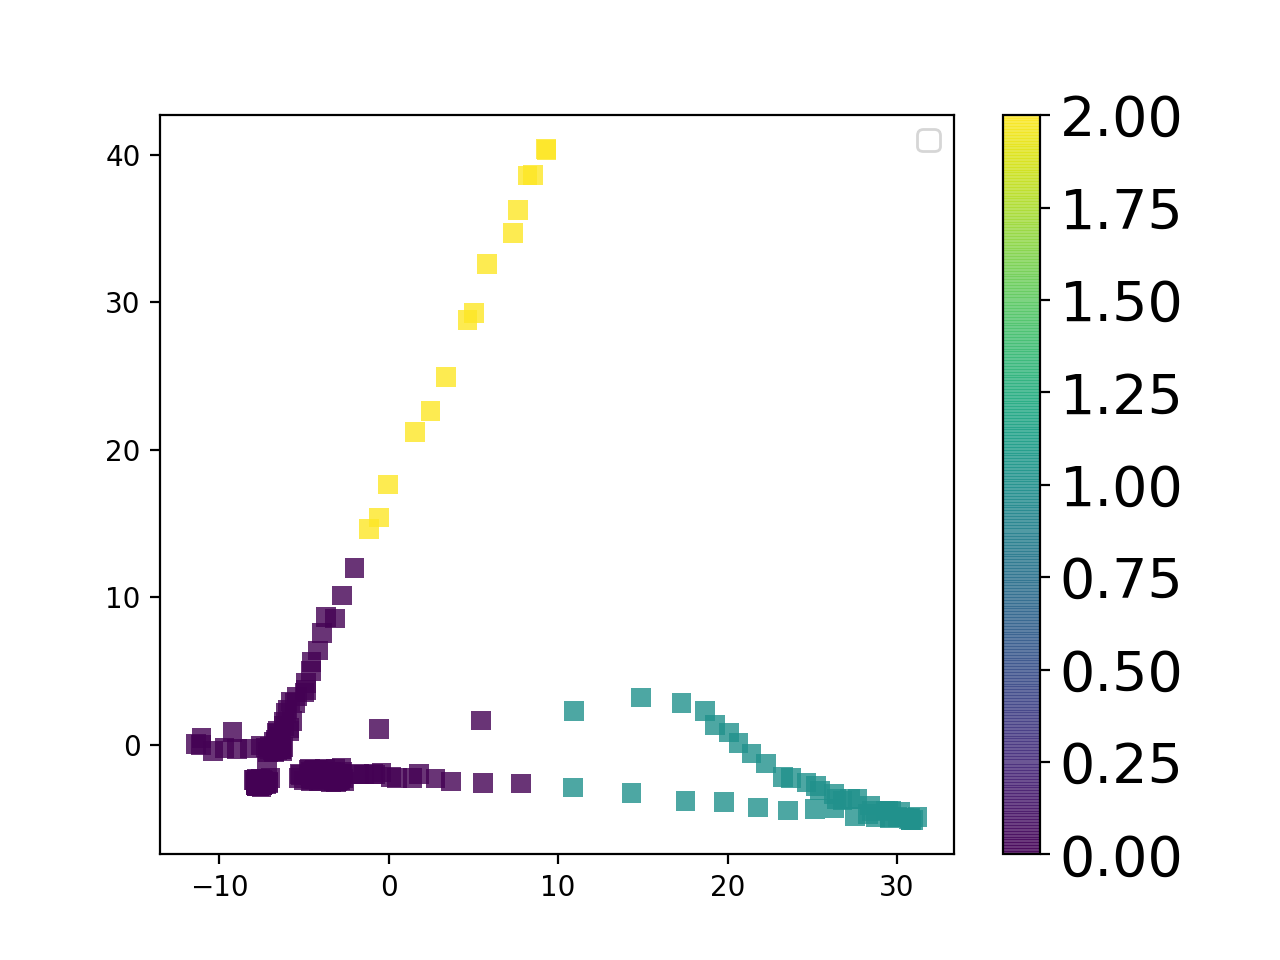

No handles with labels found to put in legend.


In [143]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>


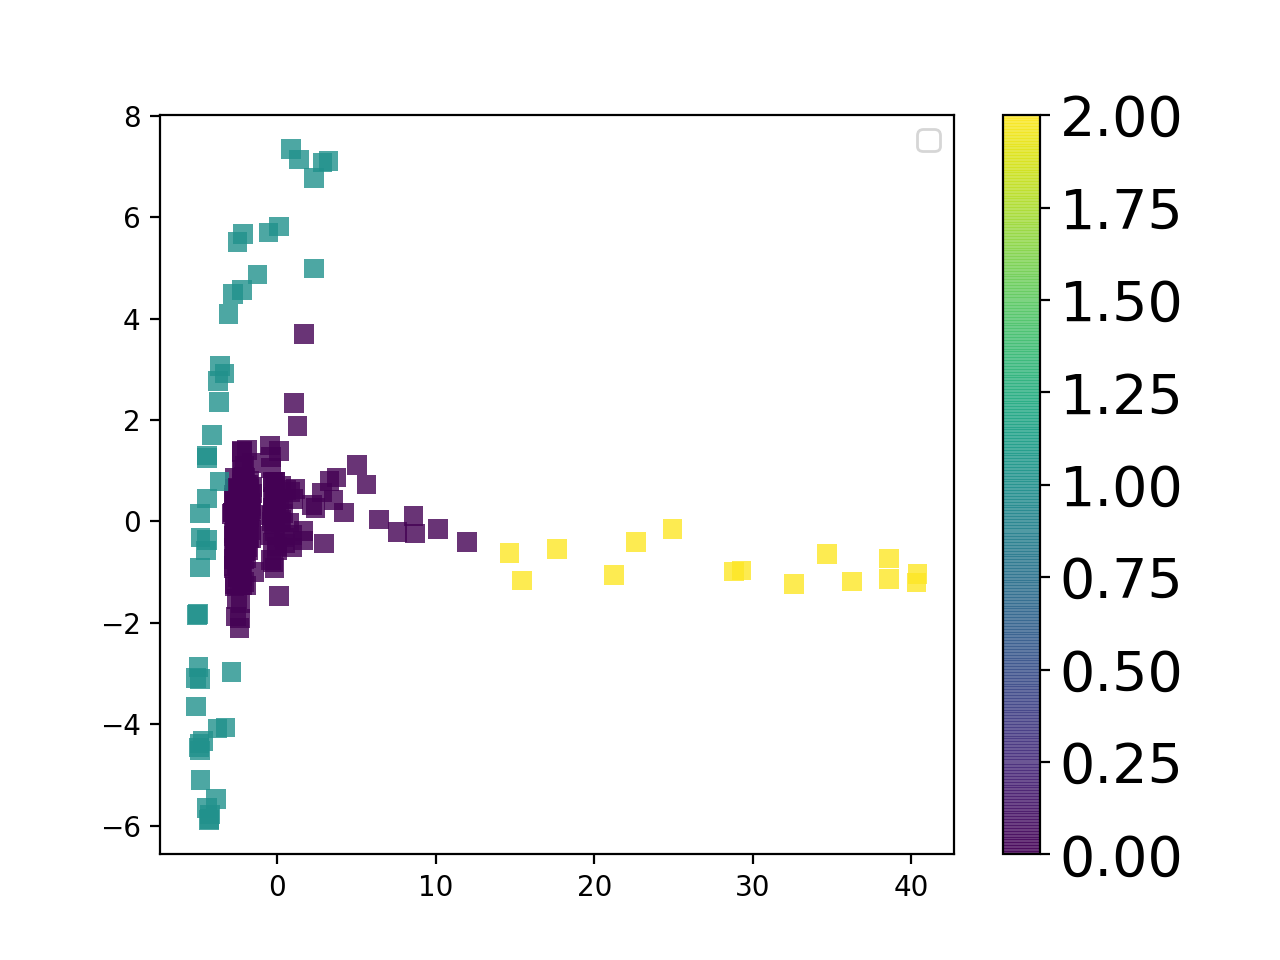

No handles with labels found to put in legend.


In [144]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 1], reduced_data[:, 2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()